<a href="https://colab.research.google.com/github/abi823/TSF/blob/main/Task_1_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abby Adamson

The Sparks Foundation - Data Science & Analytics Internship

Prediction using Supervised ML - Task 1

Importing dataset

In [79]:
# Import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

In [80]:
# Load data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


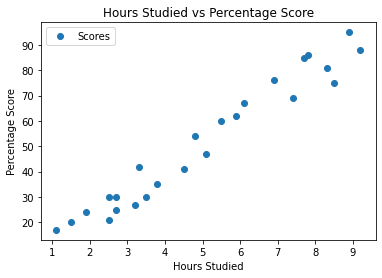

In [81]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Studied vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [82]:
#calculate the correlation value
corr = data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a strong positive linear relationship between the number of hours a student studied and the percentage scored. The correlation value between the two variables is 0.976191

Preparing dataset

In [83]:
#define X and y values from the dataset
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [84]:
#split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Training the Algorithm

In [85]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
#Check for overfitting or underfitting of the train and test dataset
print("Score of the train set",regressor.score(X_train,y_train))
print("Score of the test set",regressor.score(X_test,y_test))

Score of the train set 0.9491209376364417
Score of the test set 0.9678055545167994


In [87]:
#regression line paramaters
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

intercept: 2.826892353899737
slope: [9.68207815]


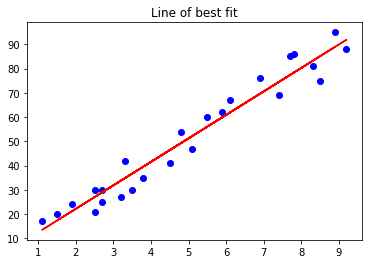

In [88]:
#line of best fit
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y, color = 'blue')
plt.plot(X, line, color = 'red')
plt.title('Line of best fit')
plt.show()

Predicting scores

In [89]:
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [90]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [91]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
hours = np.array([9.25])
hr=hours.reshape(-1,1)
stu_pred = regressor.predict(hr)
stu_pred

array([92.38611528])

Evaluating the model

In [92]:
# comprating y_test and y_pred by calculating MAE, MSE, RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
